# 20230510 統計學實習

# Chap 11 : Simple Linear Regression

*   **1. Concept about Simple Linear regression**
*   **2. An example in R** 
*   **3. Linear Regression model's assumption**
*   **4. Correlation does not imply causation**

## 1. Concept about Simple Linear regression

*    ### Simple linear regression is a statistical approach that allows to assess the linear relationship between two quantitative variables. More precisely, it enables the relationship to be quantified and its significance to be evaluated.

*    ### What makes linear regression a powerful statistical tool is that it allows to quantify by what quantity the response/dependent variable varies when the explanatory/independent variable increases by one unit.


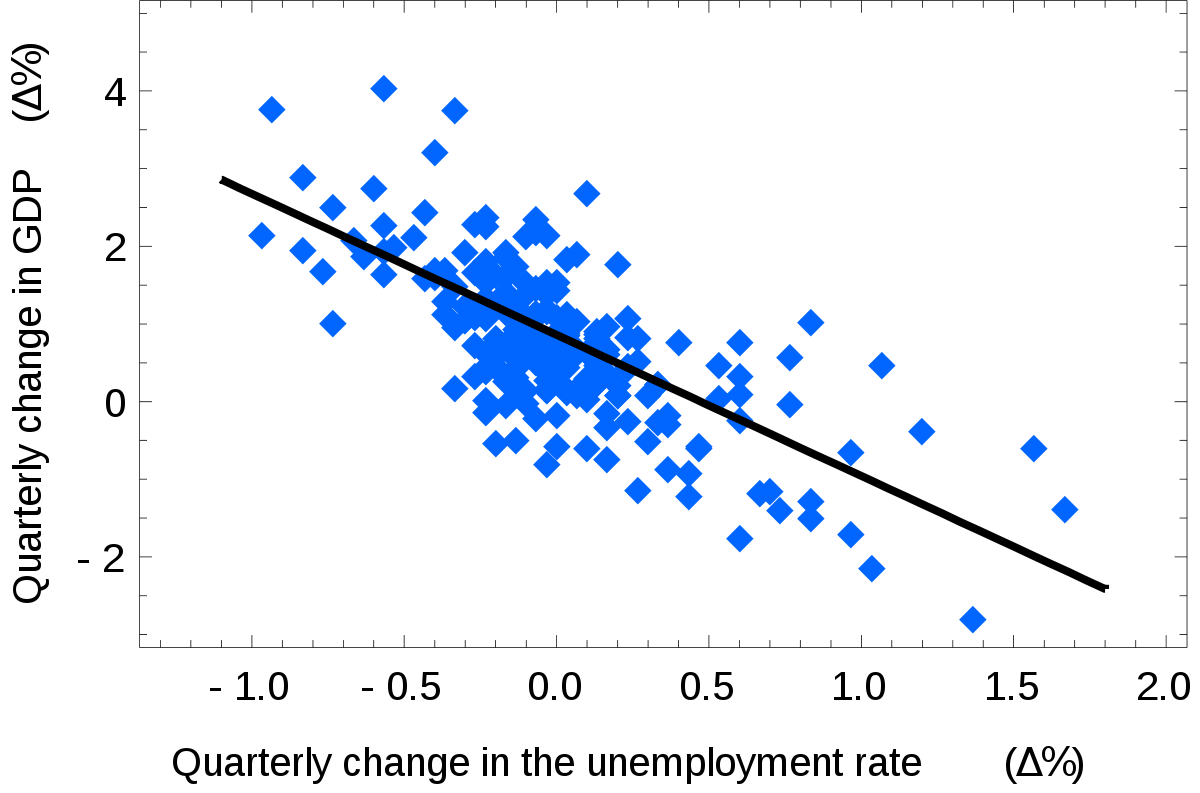

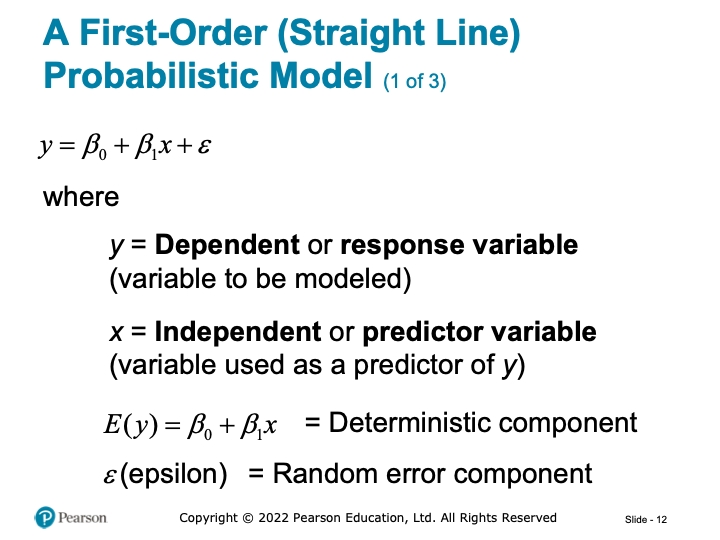

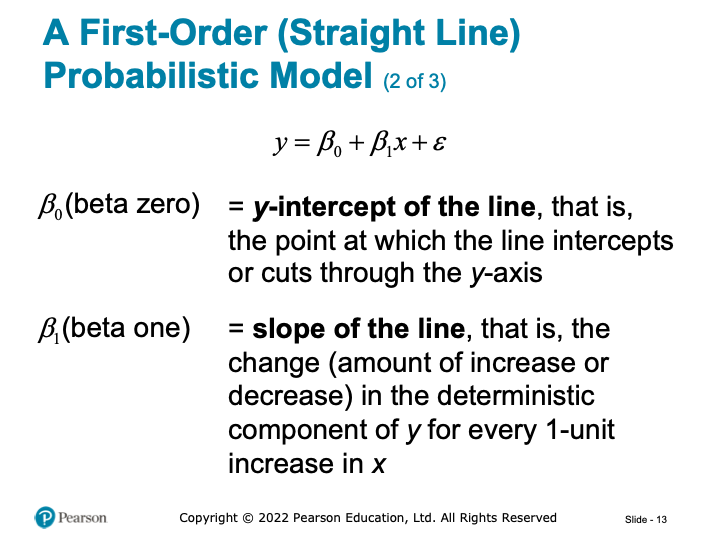

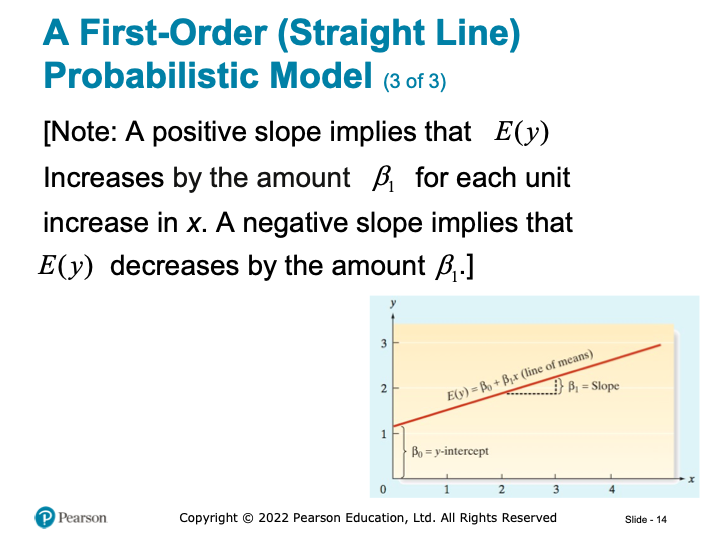

##2. An example in R

In [20]:
install.packages("ggfortify")
install.packages("caTools")
install.packages("car")

install.packages("rlang")
install.packages("ggplot2")

Installing package into 'C:/Users/eddie/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ggfortify' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\eddie\AppData\Local\Temp\RtmpeoD75T\downloaded_packages


Installing package into 'C:/Users/eddie/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'caTools' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caTools'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\eddie\AppData\Local\R\win-library\4.2\00LOCK\caTools\libs\x64\caTools.dll to C:\Users\eddie\AppData\Local\R\win-library\4.2\caTools\libs\x64\caTools.dll: Permission denied"
Warning message:
"restored 'caTools'"



The downloaded binary packages are in
	C:\Users\eddie\AppData\Local\Temp\RtmpeoD75T\downloaded_packages


Installing package into 'C:/Users/eddie/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\eddie\AppData\Local\Temp\RtmpeoD75T\downloaded_packages


Installing package into 'C:/Users/eddie/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\eddie\AppData\Local\R\win-library\4.2\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\eddie\AppData\Local\R\win-library\4.2\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"



The downloaded binary packages are in
	C:\Users\eddie\AppData\Local\Temp\RtmpeoD75T\downloaded_packages


Installing package into 'C:/Users/eddie/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependency 'rlang'




package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\eddie\AppData\Local\R\win-library\4.2\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\eddie\AppData\Local\R\win-library\4.2\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\eddie\AppData\Local\Temp\RtmpeoD75T\downloaded_packages


In [1]:
library(ggplot2)
library(ggfortify)
library(caTools)
library(car)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'ggfortify' was built under R version 4.2.3"
Warning message:
"package 'caTools' was built under R version 4.2.3"
Warning message:
"package 'car' was built under R version 4.2.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.2.2"


### 畫出里程數(y)與車輛重量(x)的散佈圖

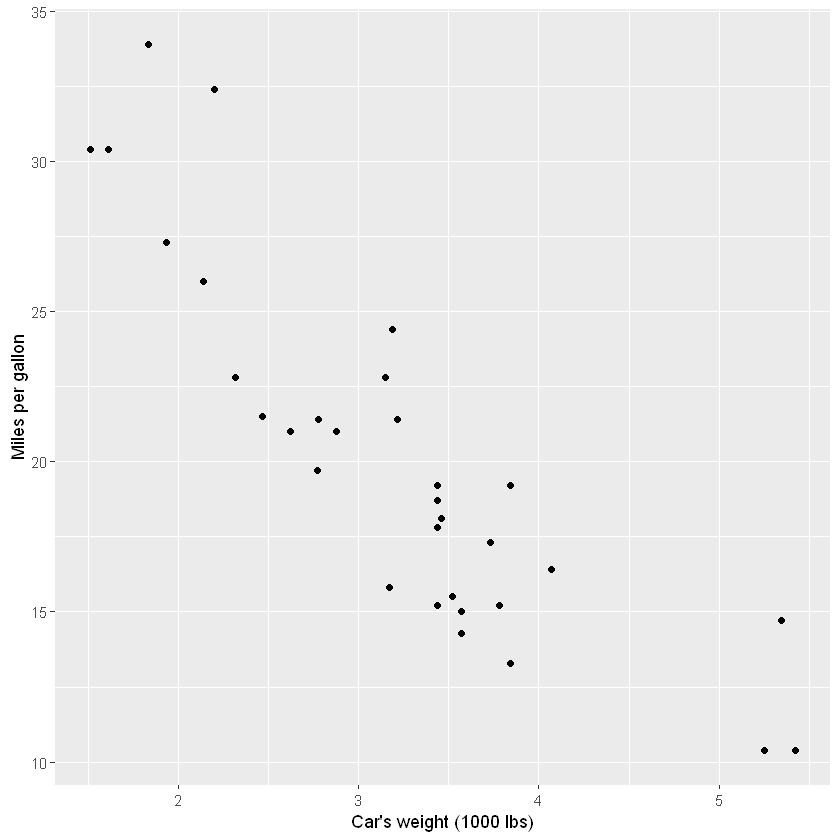

In [2]:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  labs(
    y = "Miles per gallon",
    x = "Car's weight (1000 lbs)"
  )

### graph with ordinary Least square line 

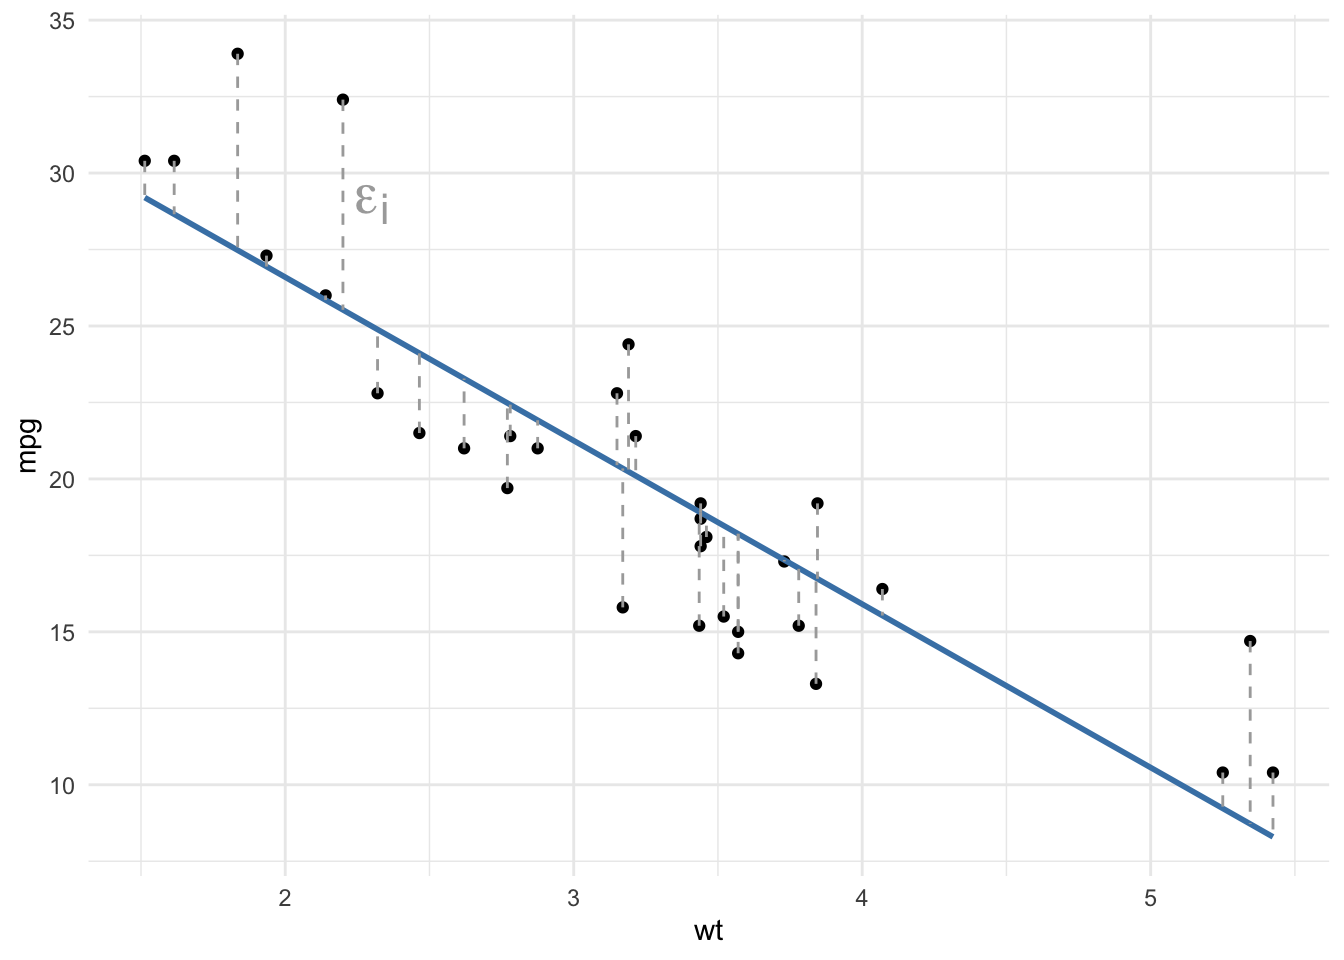

### Build the model

In [3]:
model <- lm(mpg ~ wt, mtcars)
summary(model)


Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


### The interpretation of the graph



*   Intercept(beta0):<br>
The intercept 
ˆ
β
0
=
 37.29 indicates that, for a hypothetical car weighting 0 lbs, we can expect, on average, a consumption of 37.29 miles/gallon. This interpretation is shown for illustrative purposes, but as a car weighting 0 lbs is impossible, the interpretation has no meaning. In practice, we would therefore refrain from interpreting the intercept in this case.

*   slope(beta1):<br>
There is a negative relationship between the weight and the distance a car can drive with a gallon (this was expected given the negative trend of the points in the scatterplot shown previously).<br><br>
But more importantly, a slope of -5.34 means that, for an increase of one unit in the weight (that is, an increase of 1000 lbs), the number of miles per gallon decreases, on average, by 5.34 units. In other words, for an increase of 1000 lbs, the number of miles/gallon decreases, on average, by 5.34.




Warning message:
"package 'ggpubr' was built under R version 4.2.3"
`geom_smooth()` using formula = 'y ~ x'


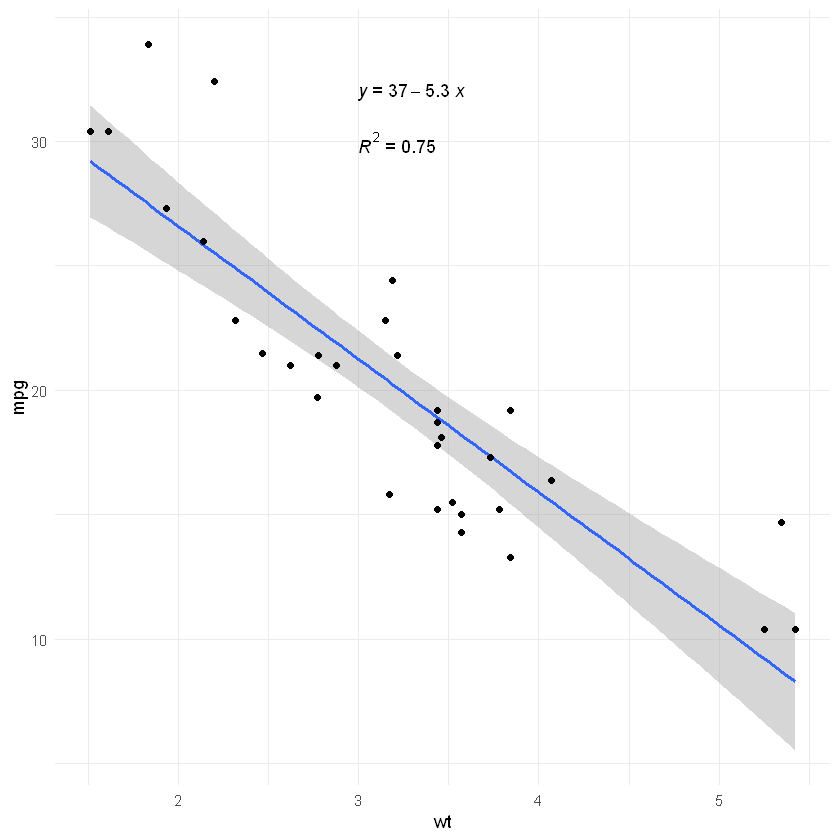

In [4]:
# load necessary libraries
library(ggpubr)

# create plot with regression line, regression equation and R^2
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_smooth(method = "lm") +
  geom_point() +
  stat_regline_equation(label.x = 3, label.y = 32) + # for regression equation
  stat_cor(aes(label = after_stat(rr.label)), label.x = 3, label.y = 30) + # for R^2
  theme_minimal()

##3. Linear Regression model's assumption



1.   **Linearity**:<br>The relationship between the two variables should be linear (at least roughly). For this reason it is always necessary to represent graphically the data with a scatterplot before performing a simple linear regression.

2.   **Independence**:<br>Observations must be independent.

3.   **Normality of the residuals**:<br>This condition can be tested visually (via a QQ-plot and/or a histogram), or more formally (via the Shapiro-Wilk test for instance).

4.   **Homoscedasticity of the residuals**:<br>The variance of the errors should be constant.


##Normality test of residuals：<br>
H0：殘差符合常態分配<br>
H1：殘差不符合常態分配

In [5]:
shapiro.test(model$residual)


	Shapiro-Wilk normality test

data:  model$residual
W = 0.94508, p-value = 0.1044


##Indepenence test of residuals：<br>
H0：殘差間互相獨立<br>
H1：殘差間有關聯

In [6]:
durbinWatsonTest(model)

 lag Autocorrelation D-W Statistic p-value
   1       0.3628798      1.251727   0.022
 Alternative hypothesis: rho != 0

##Homoscedasticity of the residuals：<br>
H0：殘差間的變異數具有同質性<br>
H1：殘差間的變異數不具有同質性

In [7]:
ncvTest(model)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.03794177, Df = 1, p = 0.84556

## Autoplot with linear regression model



1.   Residual vs. Fitted : Used to check the linear relationship assumptions.
2.   Normal Q-Q. Used to examine whether the residuals are normally distributed. It’s good if residuals points follow the straight dashed line.
3.    Scale-Location. Used to check the homogeneity of variance of the residuals (homoscedasticity).
4.    Residuals vs Leverage. Used to identify influential cases, that is extreme values that might influence the regression results when included or excluded from the analysis.



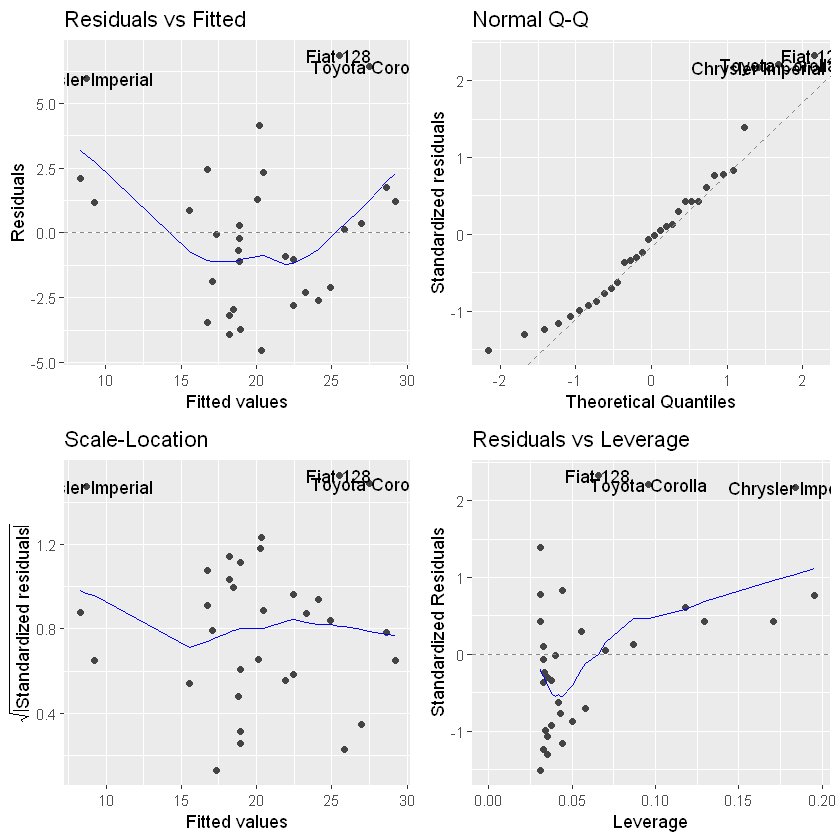

In [8]:
#autoplot function in ggfortify packages
autoplot(model)

##4. Correlation does not imply causation

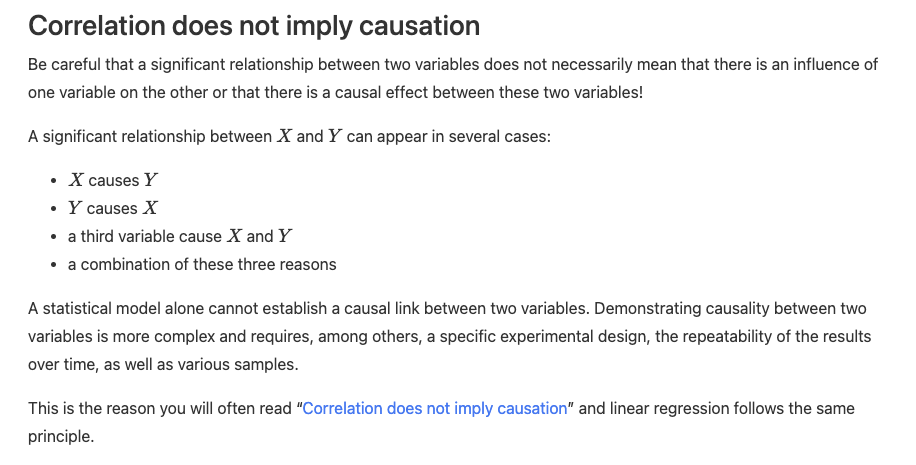